### Luiz Felipe Borges Cunha - É possível chegar a conclusões interessantes explorando esses dados. Como o filme mais popular nem sempre é o com a melhor crítica, como gêneros menos populares podem possuir um engajamento maior.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("winter")

# print("Usando pandas %s" % pd.__version__)
# print("Usando seaborn %s" % sns.__version__)
# print("Usando scipy %s" % scipy.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução

filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index('filmeId')

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução

notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução

nota_media = notas.groupby('filmeId').mean().nota
filmes['nota_media'] = nota_media.astype(float)
filmes.fillna(0, inplace=True)
np.isnan(filmes['nota_media']).sum()

0

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [0]:
# solução para calcular o total de votos por filme

total_de_votos = notas.groupby('filmeId').count().nota

In [0]:
# solução para criar a nova coluna e filtrar os filmes

filmes['total_de_votos'] = total_de_votos
filmes.fillna(0, inplace=True)
filmes_com_menos_de_50_votos = filmes[filmes['total_de_votos'] <= 50].index
filmes = filmes.drop(filmes_com_menos_de_50_votos)

In [13]:
filmes

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0
...,...,...,...,...,...
106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,2013.0,3.916667,54.0
109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2014.0,3.778846,52.0
109487,Interstellar (2014),Sci-Fi|IMAX,2014.0,3.993151,73.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

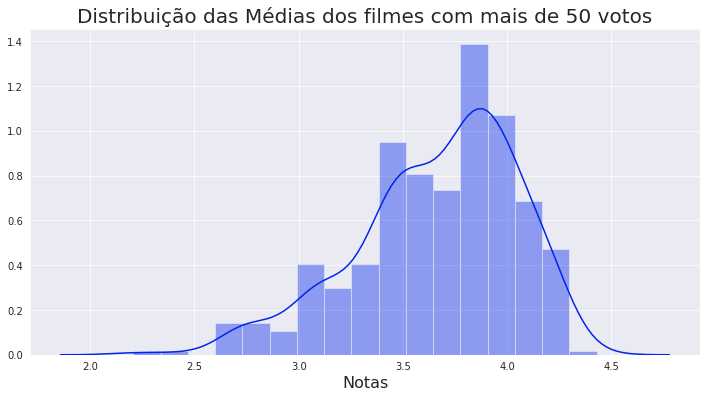

In [14]:
# solução histograma

ax = sns.distplot(filmes['nota_media'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das Médias dos filmes com mais de 50 votos', fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax

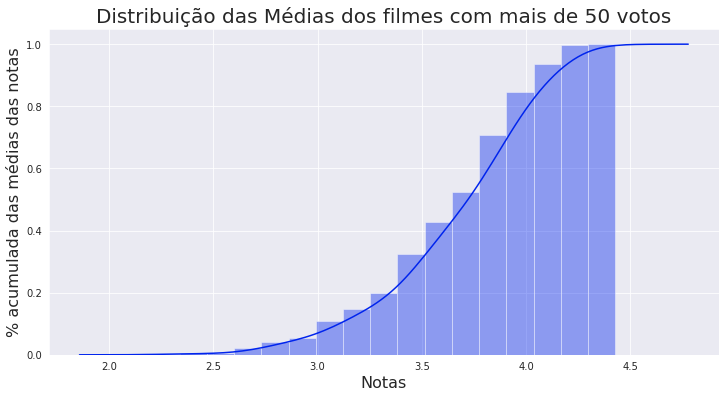

In [15]:
# solução cumulativa

ax = sns.distplot(filmes['nota_media'],
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das Médias dos filmes com mais de 50 votos', fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('% acumulada das médias das notas', fontsize=16)
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

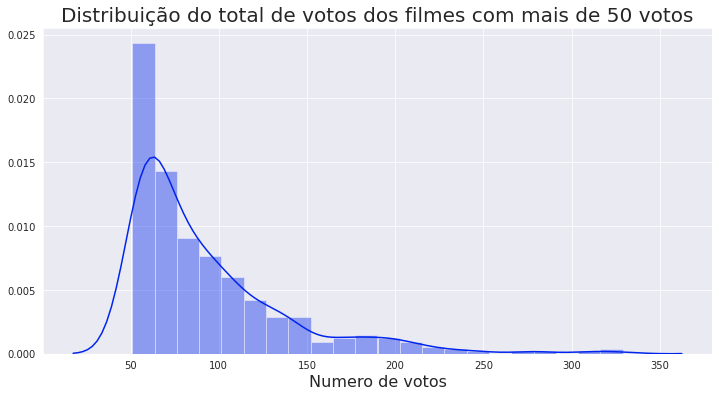

In [16]:
# solução histograma

ax = sns.distplot(filmes["total_de_votos"])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição do total de votos dos filmes com mais de 50 votos', fontsize=20)
ax.set_xlabel('Numero de votos', fontsize=16)
ax

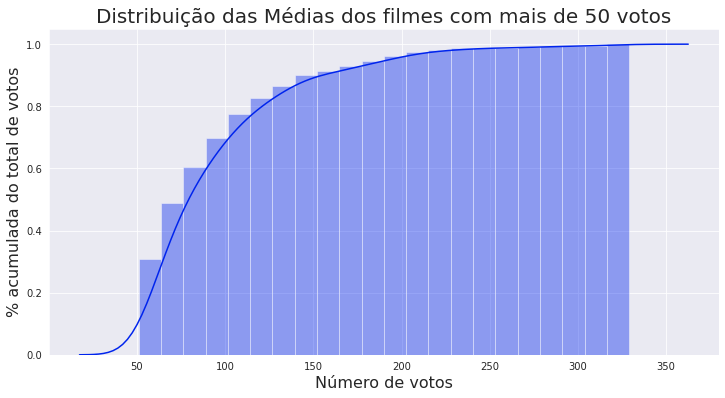

In [17]:
# solução cumulativa

ax = sns.distplot(filmes["total_de_votos"],
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das Médias dos filmes com mais de 50 votos', fontsize=20)
ax.set_xlabel('Número de votos', fontsize=16)
ax.set_ylabel('% acumulada do total de votos', fontsize=16)
ax

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução

nota_limite_dos_20_porcento = filmes['nota_media'].quantile(.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

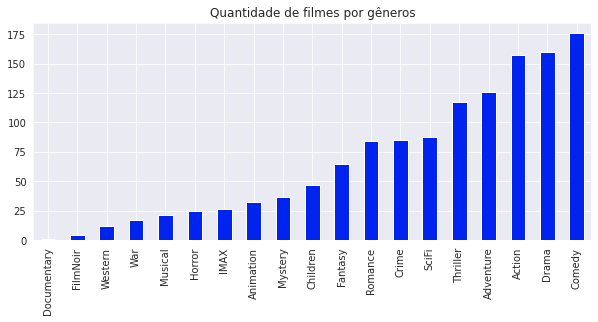

In [22]:
# solução
quantidade_de_filme_por_genero = generos.sum().sort_values()

quantidade_de_filme_por_genero.plot(kind = 'bar', 
                                    figsize = [10 , 4],
                                    title = 'Quantidade de filmes por gêneros')                             

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução

top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending = False)[0:5]

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       176
Drama        160
Action       157
Adventure    126
Thriller     117
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão

total_de_votos_por_genero = votos_por_genero_por_filme.sum().sort_values()
total_de_votos_por_genero.sort_values(ascending=False)

Action         15384.0
Drama          15145.0
Comedy         15080.0
Adventure      12817.0
Thriller       11707.0
SciFi           8789.0
Crime           8549.0
Romance         7394.0
Fantasy         5943.0
Children        4331.0
Mystery         3402.0
Animation       3066.0
IMAX            2392.0
Horror          2165.0
War             2013.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary       58.0
dtype: float64

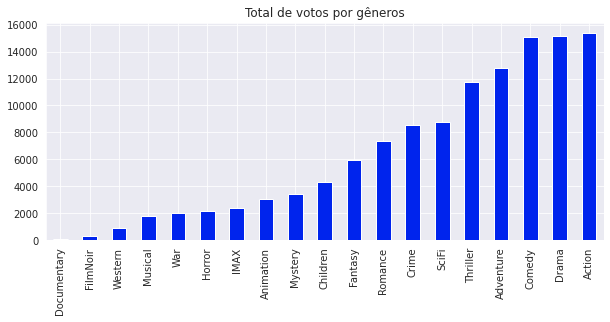

In [27]:
# solução

total_de_votos_por_genero.plot(kind = 'bar', 
                               figsize = [10 , 4],
                               title = 'Total de votos por gêneros')

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código

votos_por_filme_por_genero = total_de_votos_por_genero / quantidade_de_filme_por_genero
votos_por_filme_por_genero.sort_values(ascending=False)

War            118.411765
Adventure      101.722222
Crime          100.576471
Thriller       100.059829
SciFi           99.875000
Action          97.987261
Animation       95.812500
Drama           94.656250
Children        92.148936
IMAX            92.000000
Mystery         91.945946
Fantasy         91.430769
Romance         88.023810
Musical         86.761905
Horror          86.600000
Comedy          85.681818
Western         75.000000
FilmNoir        72.750000
Documentary     58.000000
dtype: float64

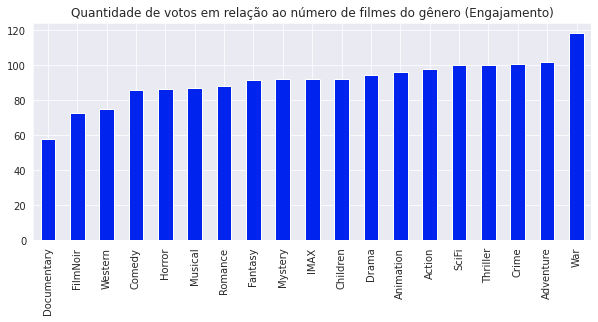

In [29]:
# solução com visualização 

votos_por_filme_por_genero.sort_values().plot(kind = 'bar', 
                               figsize = [10 , 4],
                               title = 'Quantidade de votos em relação ao número de filmes do gênero (Engajamento)')

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre): O gênero Action com certeza possui um nicho muito maior que War, é possível ver uma diferença clara no número de filmes em cada um dos gêneros. E a quantidade de filmes influencia diretamente no número de votos. Porém ao verificar os votos relativos a quantidade de filmes, é possível concluir que as pessoas que assistem ao gênero War estão mais dispostas a votar no filme (ainda não sendo possível concluir se de maneira positiva ou negativa), concluindo que o gênero War possui um engajamento significativamente maior que Action.
    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Total de votos dos gêneros Horror e Adventure')

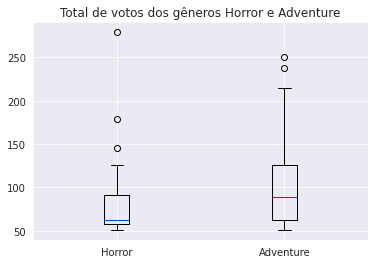

In [30]:
# solução:

import matplotlib.pyplot as plt

genero_horror = filmes[filmes['Horror'] == 1]
genero_adventure = filmes[filmes['Adventure'] == 1]

plt.boxplot([genero_horror.total_de_votos, genero_adventure.total_de_votos], 
            labels= ['Horror', 'Adventure'],)
plt.title('Total de votos dos gêneros Horror e Adventure')

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text major ticklabel objects>)

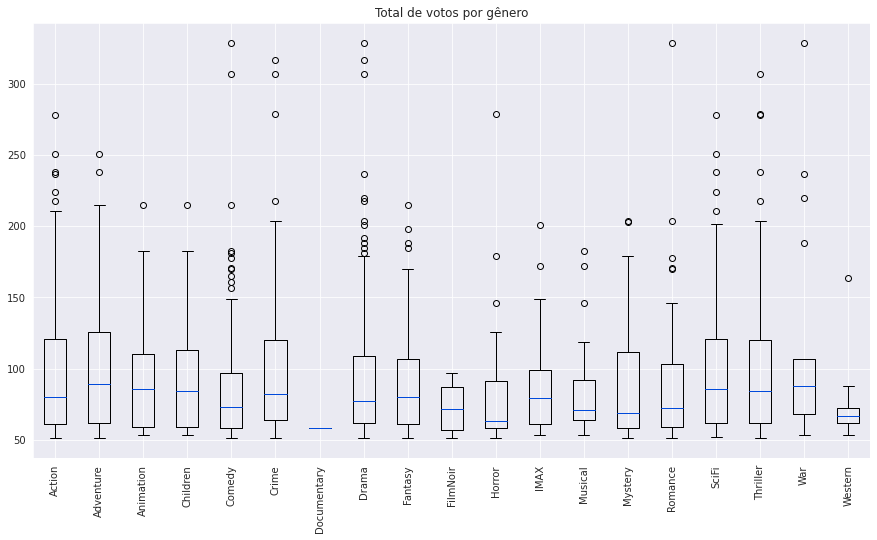

In [31]:
genero_action = filmes[filmes['Action'] == 1]
genero_adventure = filmes[filmes['Adventure'] == 1]
genero_animation = filmes[filmes['Animation'] == 1]
genero_children = filmes[filmes['Children'] == 1]
genero_comedy = filmes[filmes['Comedy'] == 1]
genero_crime = filmes[filmes['Crime'] == 1]
genero_documentary = filmes[filmes['Documentary'] == 1]
genero_drama = filmes[filmes['Drama'] == 1]
genero_fantasy = filmes[filmes['Fantasy'] == 1]
genero_filmNoir = filmes[filmes['FilmNoir'] == 1]
genero_horror = filmes[filmes['Horror'] == 1]
genero_imax = filmes[filmes['IMAX'] == 1]
genero_musical = filmes[filmes['Musical'] == 1]
genero_mystery = filmes[filmes['Mystery'] == 1]
genero_romance = filmes[filmes['Romance'] == 1]
genero_sciFi = filmes[filmes['SciFi'] == 1]
genero_thriller = filmes[filmes['Thriller'] == 1]
genero_war = filmes[filmes['War'] == 1]
genero_western = filmes[filmes['Western'] == 1]

fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.set_title('Total de votos por gênero')
ax1.boxplot([genero_action.total_de_votos, genero_adventure.total_de_votos, 
             genero_animation.total_de_votos, genero_children.total_de_votos, 
             genero_comedy.total_de_votos, genero_crime.total_de_votos, 
             genero_documentary.total_de_votos, genero_drama.total_de_votos, 
             genero_fantasy.total_de_votos, genero_filmNoir.total_de_votos, 
             genero_horror.total_de_votos, genero_imax.total_de_votos, 
             genero_musical.total_de_votos, genero_mystery.total_de_votos, 
             genero_romance.total_de_votos, genero_sciFi.total_de_votos, 
             genero_thriller.total_de_votos, genero_war.total_de_votos, 
             genero_western.total_de_votos], 
            labels= ['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
                     'Crime','Documentary', 'Drama', 'Fantasy', 'FilmNoir',
                     'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'SciFi', 
                     'Thriller', 'War', 'Western'])
plt.xticks(rotation=90)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: Complicado responder essa questão, sendo que os dados não citam faturamento. Porém como os dados que possuo, o gênero Adventure possui muito mais filmes, dando a entender que é um gênero mais popular. Então com base nos dados, sugiro que crie um filme do gênero Adventure. 
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

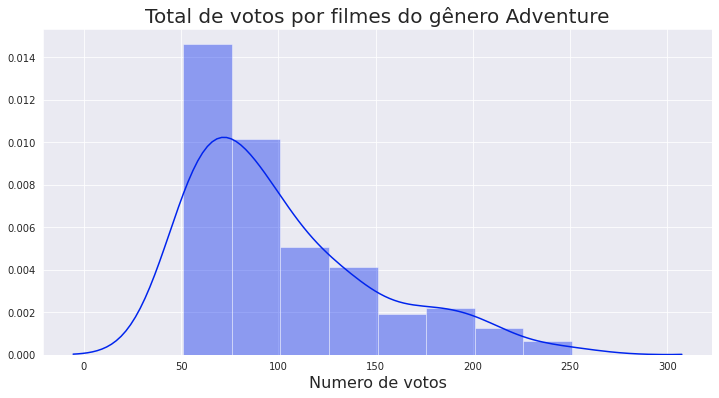

In [32]:
# solucao histograma de aventura
ax = sns.distplot(genero_adventure.total_de_votos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Total de votos por filmes do gênero Adventure', fontsize=20)
ax.set_xlabel('Numero de votos', fontsize=16)
ax

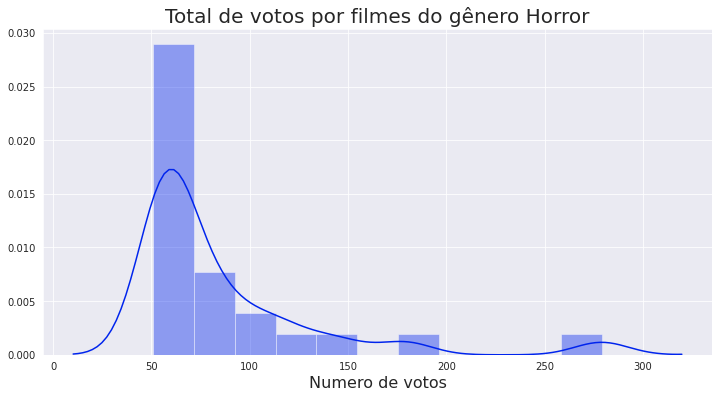

In [33]:
# solucao histograma de horror
ax = sns.distplot(genero_horror.total_de_votos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Total de votos por filmes do gênero Horror', fontsize=20)
ax.set_xlabel('Numero de votos', fontsize=16)
ax

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

# com certeza não são normais, mas vou confirmar com um teste
from scipy.stats import normaltest

_, p = normaltest(genero_adventure.total_de_votos)
p

1.58724177983542e-05

In [35]:
# solução com o teste desejado

from scipy.stats import ranksums

_, p = ranksums(genero_adventure.total_de_votos, genero_horror.total_de_votos)
p

0.029801578566891647

### Solução (explique sua conclusão): o gênero Adventure continua na frente, mesmo que não seja por uma grande diferença(0,02).



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Média de votos dos gêneros Horror e Adventure')

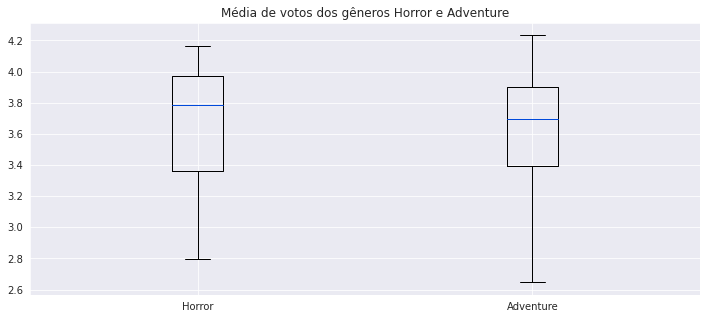

In [36]:
# solução:

genero_horror = filmes[filmes['Horror'] == 1]
genero_adventure = filmes[filmes['Adventure'] == 1]

fig2, ax2 = plt.subplots(figsize=(12,5))
ax2.boxplot([genero_horror.nota_media, genero_adventure.nota_media], 
            labels= ['Horror', 'Adventure'],)
ax2.set_title('Média de votos dos gêneros Horror e Adventure')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: Usando os dados apresentados, Horror tem uma distribuição maior.



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

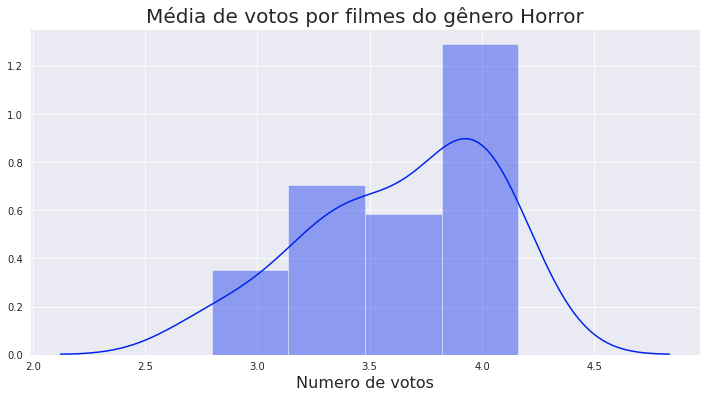

In [37]:
# solucao histograma de aventura

ax = sns.distplot(genero_horror.nota_media)
ax.figure.set_size_inches(12, 6)
ax.set_title('Média de votos por filmes do gênero Horror', fontsize=20)
ax.set_xlabel('Numero de votos', fontsize=16)
ax

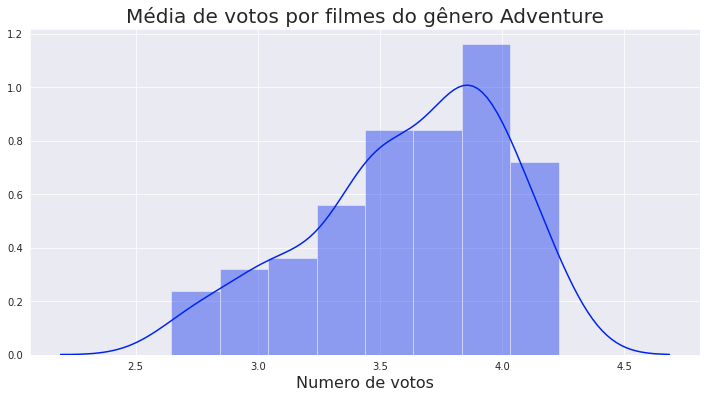

In [38]:
# solucao histograma de horror

ax = sns.distplot(genero_adventure.nota_media)
ax.figure.set_size_inches(12, 6)
ax.set_title('Média de votos por filmes do gênero Adventure', fontsize=20)
ax.set_xlabel('Numero de votos', fontsize=16)
ax

In [39]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_, p = normaltest(genero_adventure.nota_media)
p

0.016341547276884364

In [40]:
# solução com o teste desejado

_, p = ranksums(genero_horror.nota_media, genero_adventure.nota_media)
print(p)

from statsmodels.stats.weightstats import DescrStatsW

descr_horror = DescrStatsW(genero_horror.nota_media)
descr_adventure = DescrStatsW(genero_adventure.nota_media)
comparacao = descr_horror.get_compare(descr_adventure)

comparacao.summary(use_t=True)


0.6759304067428379


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0189,0.086,0.218,0.827,-0.152,0.190


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: Sim, continua em Horror. Estatisticamente a diferença é ainda maior.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: Recomendo Horror, por a maior prioridade ser sucesso de crítica.



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [41]:
total_de_votos_por_genero

Documentary       58.0
FilmNoir         291.0
Western          900.0
Musical         1822.0
War             2013.0
Horror          2165.0
IMAX            2392.0
Animation       3066.0
Mystery         3402.0
Children        4331.0
Fantasy         5943.0
Romance         7394.0
Crime           8549.0
SciFi           8789.0
Thriller       11707.0
Adventure      12817.0
Comedy         15080.0
Drama          15145.0
Action         15384.0
dtype: float64

In [42]:
# solução: calculando os 2 generos mais votados

total_de_votos_por_genero.sort_values(ascending=False)[0:2]

Action    15384.0
Drama     15145.0
dtype: float64

In [43]:
# solução: encontrando os top 5 filmes desses generos

total_de_votos_drama = genero_drama.total_de_votos.sort_values(ascending=False)
total_de_votos_action = genero_action.total_de_votos.sort_values(ascending=False)
top_5_total_de_votos_drama_aciton = total_de_votos_drama.append(total_de_votos_action).sort_values(ascending=False)[0:5]
top_5_total_de_votos_drama_aciton

filmeId
356     329.0
318     317.0
296     307.0
2571    278.0
260     251.0
Name: total_de_votos, dtype: float64

## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [44]:
# solucao

filmes.corr().nota_media.sort_values()

# Os gêneros com maior correlação são Crime e Drama
# Os gêneros com menor correlação são Action e Comedy

Comedy              -0.257319
ano_de_lancamento   -0.161482
Action              -0.156240
SciFi               -0.127430
Adventure           -0.076575
Romance             -0.068526
Western             -0.061675
Children            -0.033041
Fantasy             -0.028242
Horror              -0.017465
Thriller            -0.012637
Musical             -0.010052
Documentary          0.013857
Animation            0.042109
IMAX                 0.056876
FilmNoir             0.082529
War                  0.117907
Mystery              0.126669
Crime                0.184099
Drama                0.279718
total_de_votos       0.347190
nota_media           1.000000
Name: nota_media, dtype: float64

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [45]:
# solucao

filmes.corr().total_de_votos.sort_values()

# Os gêneros com maior correlação são Adventure e War
# Os gêneros com menor correlação são Comedy e Western

Comedy              -0.135035
Western             -0.066546
Romance             -0.055388
FilmNoir            -0.042754
Documentary         -0.036626
Horror              -0.035572
Musical             -0.031656
Fantasy             -0.016561
ano_de_lancamento   -0.016299
Mystery             -0.008649
Children            -0.008344
IMAX                -0.006858
Animation            0.015584
Drama                0.023085
SciFi                0.072107
Action               0.076883
Crime                0.078043
Thriller             0.089265
War                  0.109781
Adventure            0.116933
nota_media           0.347190
total_de_votos       1.000000
Name: total_de_votos, dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

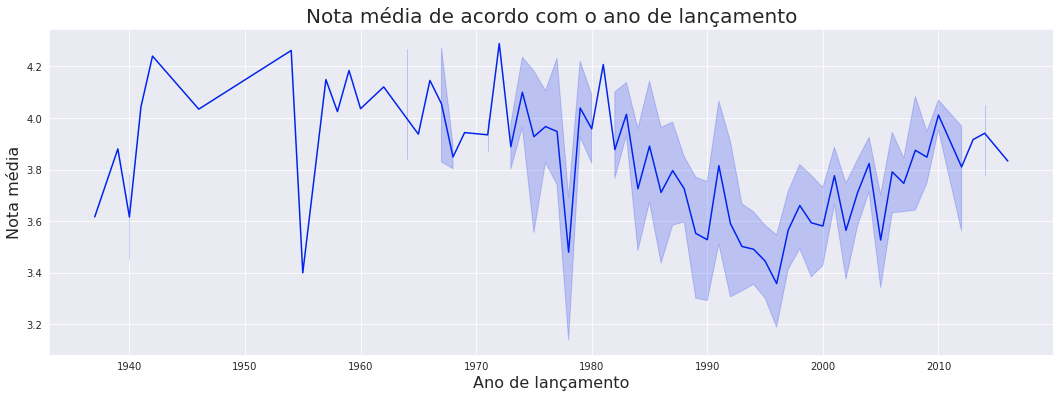

In [46]:
# solucao

ax = sns.lineplot(x = filmes.ano_de_lancamento, y = filmes.nota_media)
ax.figure.set_size_inches(18, 6)
ax.set_title('Nota média de acordo com o ano de lançamento', fontsize=20)
ax.set_xlabel('Ano de lançamento', fontsize=16)
ax.set_ylabel('Nota média', fontsize=16)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [47]:
# solução (código)

filmes.corr().ano_de_lancamento.sort_values()[1:2]

nota_media   -0.161482
Name: ano_de_lancamento, dtype: float64

### Solução (explicação) Possivelmente essa correlação só existe pois só os melhores filmes de antes de 1980 foram lembrados até a presente data e logo possuem notas altas. A variedade de filmes avaliados nos anos recentes é maior, o que tende a diminuir a média. Existe também o fator de pessoas do 'futuro' avaliando filmes do "passado" o que tira a confiabilidade da correlação.



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

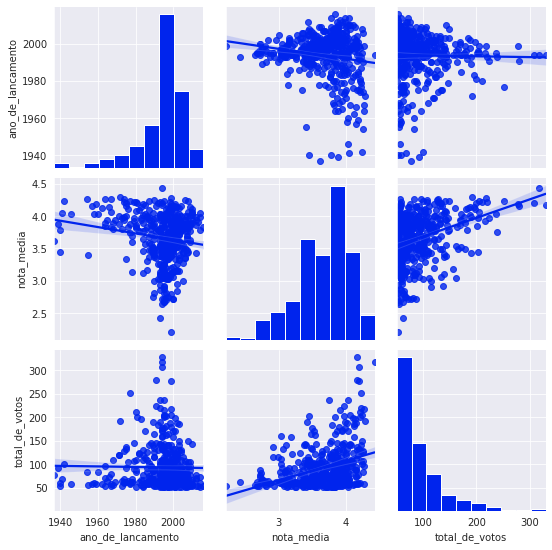

In [48]:
# solução

infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]

ax = sns.pairplot(infos, kind='reg')
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

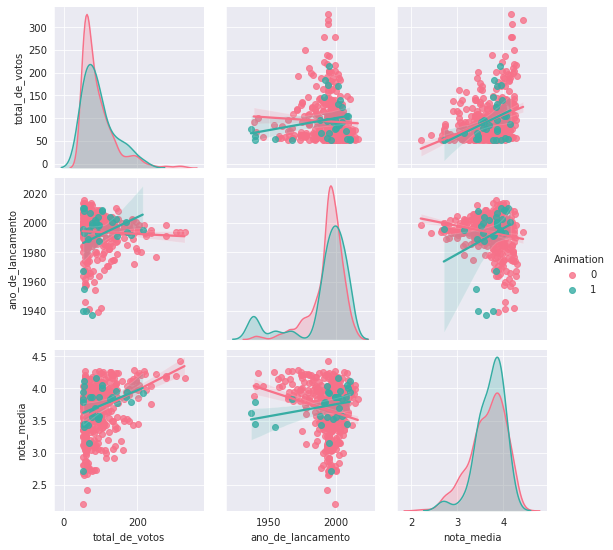

In [49]:
ax = sns.pairplot(filmes, hue= 'Animation',palette= 'husl', vars=['total_de_votos', 'ano_de_lancamento', 'nota_media'], kind='reg')
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução: A relação com os filmes mais antigos é despersa demais para assumir linearidade, em relação aos mais novos, se houvessem mais dados, talvez fosse possível, porém eu não usaria esse dado.
### Relacionando ano_de_lancamento x total_de_votos os dados continuam muito dispersos e dificíl assumir linearidade
### analisando as outras categorias com todos os gêneros, os dados se comportam de maneira mais linear principalmente com nota_media x total_de_votos.
### Minha hipótese é que não existe uma correlação clara entre as colunas e que o dataset não é ideal para esse tipo de análise.



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

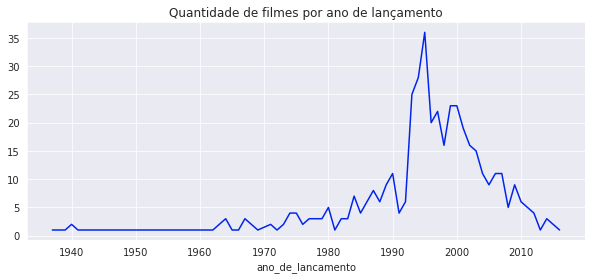

In [50]:
# solução

filmes_por_data_de_lançamento = filmes.groupby('ano_de_lancamento').count().titulo
filmes_por_data_de_lançamento.plot(figsize = [10 , 4], 
                                   title = 'Quantidade de filmes por ano de lançamento')

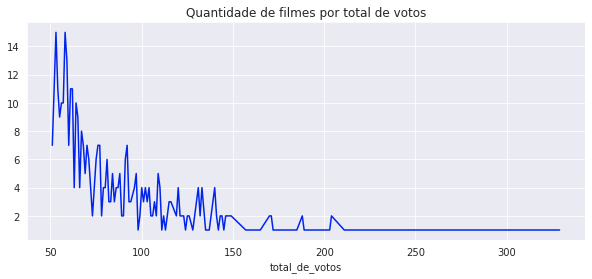

In [51]:
filmes_por_quantidade_de_votos = filmes.groupby('total_de_votos').count().titulo
filmes_por_quantidade_de_votos.plot(figsize = [10 , 4],
                                    title = 'Quantidade de filmes por total de votos')

### Analisando os dados que possuem o requisito mínimo de número de votos, percebo um viés. Uma parte expressiva dos filmes estão entre 1995 e 2005, possívelmente representando a idade de quem votou nos filmes. Suponho que a tendencia, com globalização e tecnologia, seria que número de filmes aumentasse conforme mais próximo a atualidade.
### Outra questão pelo tamanho do dataset é que o número de votos por filme fica muito concentrado no requisito mínimo, tornando os dados muito esparsos e difíceis de tirar conclusões embasadas